In [3]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import data

In [4]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [5]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


# ABUW_1645 iModulon

## ABUW_1645 iModulon gene weights 

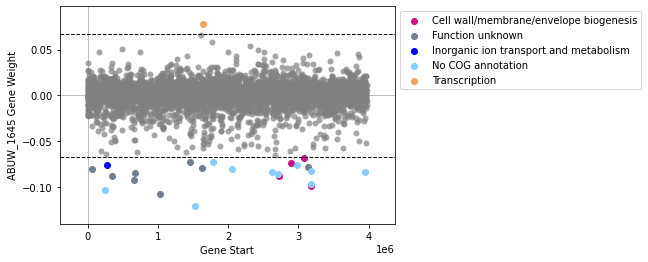

In [128]:
plot_gene_weights(ica_data, 'ABUW_1645')
#plt.savefig('../figures/Figure4_ABUW_1645.svg')

In [125]:
ica_data.view_imodulon('ABUW_1645')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_0053,-0.080998,ABUW_0053,NaN,58624,58782,-,UPF0391 membrane protein,Function unknown,NaN,ABUW_1645
ABUW_0233,-0.104027,ABUW_0233,NaN,252271,252714,-,hypothetical protein,No COG annotation,NaN,ABUW_1645
ABUW_0259,-0.076211,ABUW_0259,NaN,274715,276916,+,sulfate transporter,Inorganic ion transport and metabolism,NaN,"AbaM,ABUW_1645"
ABUW_0328,-0.088655,ABUW_0328,NaN,350523,350966,+,hemerythrin,Function unknown,NaN,ABUW_1645
ABUW_0646,-0.092307,ABUW_0646,NaN,651474,651917,-,hypothetical protein,Function unknown,NaN,ABUW_1645
ABUW_0673,-0.085375,ABUW_0673,NaN,676016,676357,+,hypothetical protein,Function unknown,NaN,NaN
ABUW_1015,-0.108050,carO,NaN,1026616,1027356,+,outer membrane protein CarO,Function unknown,NaN,NaN
ABUW_1466,-0.072522,ABUW_1466,NaN,1456445,1456678,-,hypothetical protein,Function unknown,NaN,"Fur,AbaM,ABUW_1645"
ABUW_1536,-0.120683,ABUW_1536,NaN,1522327,1522557,-,hypothetical protein,No COG annotation,NaN,ABUW_1645
ABUW_1631,-0.079094,ABUW_1631,NaN,1628562,1629092,+,hypothetical protein,Function unknown,NaN,ABUW_1645


# ABUW_1645 Activity: Validation and Discovery

Text(0, 0.5, 'ABUW_1645 iModulon Activity')

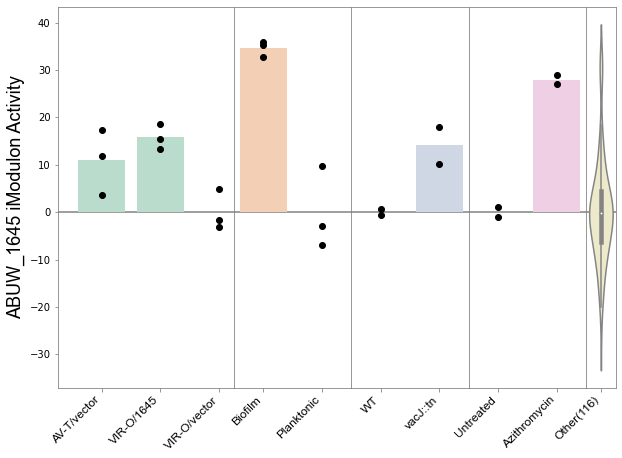

In [5]:
from pymodulon import io

import itertools as it
from collections import OrderedDict
%matplotlib inline

imod = 'ABUW_1645'

# should have the form {'project1': ['samp1', 'samp2'],
#                       'project2': ['samp1', 'samp2']}

samples = OrderedDict({'AB5075_VIR-O_AV-T': ['AV-T/vector',
                     'VIR-O/1645','VIR-O/vector'],
          'AB5075_biofilm+abx': ['biofilm', 'planktonic'],
          'vacJ_LL-37': ['WT','vacJ'],
          'AB5075_AZI': ['AZI_000', 'AZI_040']})

# double check to make sure labels match the samples
labels = ['Azithromycin', 'Untreated', 'vacJ::tn', 'WT', 'Planktonic', 'Biofilm', 'VIR-O/vector', 'VIR-O/1645', 'AV-T/vector']

err = 'Number of samples does not match the number of labels'
assert(len(list(it.chain(*samples.values()))) == len(labels)), err



cmap = plt.cm.get_cmap("Pastel2", 8)
colors = cmap(np.arange(cmap.N))

def get_mean(group):
    return [ica_data.A.loc[imod, grp.index].mean() for idx, grp in group.groupby('condition')]

# change [10,5] to change the size and shape of the plot
width_spaces = [len(samples[i]) for i in samples]
width_spaces.append(0.5)
fig, axes = plt.subplots(1, len(samples) + 1, figsize=[10,7], sharey=True,
                         gridspec_kw={'width_ratios': width_spaces})
plt.subplots_adjust(wspace=0, hspace=0)

used_index = []
for ax, prj, clr in zip(axes, samples, colors):
    cond = samples[prj]
    samps = ica_data.sample_table[(ica_data.sample_table.project == prj) &
                                 (ica_data.sample_table.condition.isin(cond))]
    used_index.extend(samps.index)
    bp = sns.barplot(x=np.arange(len(cond)), y=get_mean(samps), ax=ax, color=clr,
                    dodge=False)
   
    for xl, sgroup in zip(bp.get_xticks(), samps.groupby('condition')):
        sidx, sgrp = sgroup
        ax.scatter([xl] * len(sgrp), ica_data.A.loc[imod, sgrp.index], color='black',
                  zorder=10)
    new_width = 0.25 * len(cond)
    ax.hlines(0, 0 - new_width, len(cond), color='gray', zorder=-1)
    ax.set_xlim(0 - new_width, len(cond) - new_width)
    ax.set_xticklabels([labels.pop() for i in range(len(cond))],
                       rotation=45, ha='right', fontname='Arial', fontsize=12)

rest = ica_data.A.loc[imod, [i for i in ica_data.A if i not in used_index]]
sns.violinplot(x=[1] * len(rest), y=rest, ax=axes[-1], color='#f2efc7')

#clear ticks
for a in axes:
    a.tick_params(color='gray')
    for spine in a.spines.values():
        spine.set_edgecolor('gray')
for a in axes[1:]:
    a.tick_params(left=False)

axes[-1].set_ylabel('')
axes[-1].hlines(0, -2, 2, color='gray', zorder=-1)
axes[-1].set_xlim(-0.5, 0.5)
axes[-1].set_xticklabels([f'Other({len(rest)})'], rotation=45, ha='right',
                         fontname='Arial', fontsize=12)

axes[0].set_ylabel(f'{imod} iModulon Activity', fontname='Arial', fontsize=18)

#plt.savefig("../figures/Figure4_Activities.svg",transparent = True)

# What is the real GacA-GacS iModulon?

# Comparing GacA::tn vs. WT

## 1D DIMA plot to identify low activity iModulons in gacA mutants

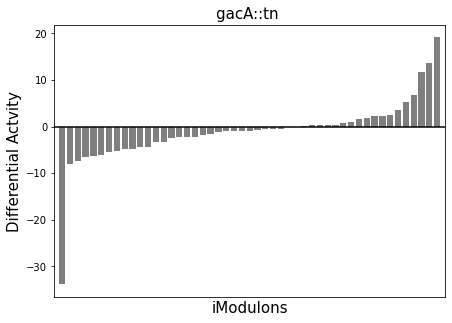

In [9]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "mutants:WT"
diff_condition = "mutants:gacA"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)

fig,ax = plt.subplots(figsize=[7,5])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["full_name"]==diff_condition].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()

labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)

# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,49],[0,0],color="black")
ax.set_xlim([-1,49])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("Differential Actvity",fontsize=15)
ax.set_title("gacA::tn ",fontsize=15)
    
plt.xticks([])
#plt.savefig("../figures/Figure4_gacA_DIMA.svg",transparent=True)

In [32]:
activity_data

GacA-GacS                -33.852156
NDH-1                     -7.958404
Unc-7                     -7.313246
Pnt                       -6.530079
ppGpp                     -6.289289
Translation               -6.075369
RpoH                      -5.490411
ABUW_1645 OE              -5.168102
Unc-2                     -4.782287
p1AB5075                  -4.722825
Unc-8                     -4.452935
Unc-11                    -4.350753
KpdD-KpdE                 -3.403637
Cbl/GigC                  -3.347881
Fe-S Cluster              -2.535288
Unc-1                     -2.229185
Unc-6                     -2.201393
Unc-13                    -2.173421
Unc-10                    -1.807716
Acetoin/butanediol        -1.533194
Fur-1                     -1.080785
mumR                      -0.986192
Heavy metal resistance    -0.920229
GigA-GigB KO              -0.913712
PaaX                      -0.910525
Unc-9                     -0.791992
BfmR-BfmS                 -0.493227
Lipoprotein               -0

<AxesSubplot:xlabel='Gene Start', ylabel='GacA-GacS Gene Weight'>

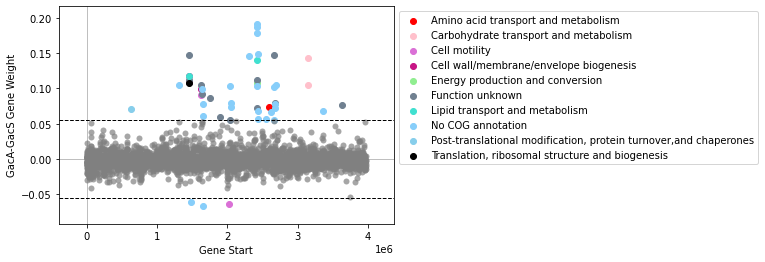

In [29]:
plot_gene_weights(ica_data, 'GacA-GacS')
#plt.savefig("../figures/Figure4_GacAS.svg",transparent=True)

In [30]:
ica_data.view_imodulon('GacA-GacS')

,gene_weight,gene_name,old_locus_tag,start,stop,strand,gene_product,COG,uniprot,regulator,accession,ncbi_protein,new_locus_tag,new_accession,operon
ABUW_0628,0.070794,ABUW_0628,NaN,629273,629914,-,peroxidase,"Post-translational modification, protein turno...",NaN,ABUW_1645,CP008706.1,AKA30398.1,ABUW_RS03090,NZ_CP008706.1,Op327
ABUW_1286,0.104386,ABUW_1286,NaN,1306188,1306541,+,hypothetical protein,No COG annotation,NaN,ABUW_1645,CP008706.1,AKA31034.1,ABUW_RS06270,NZ_CP008706.1,Op681
ABUW_1466,0.147799,ABUW_1466,NaN,1456445,1456678,-,hypothetical protein,Function unknown,NaN,"Fur,AbaM,ABUW_1645",CP008706.1,AKA31206.1,ABUW_RS07145,NZ_CP008706.1,None
ABUW_1467,0.118037,ABUW_1467,NaN,1456962,1457951,+,acyl-CoA dehydrogenase,Lipid transport and metabolism,NaN,ABUW_1645,CP008706.1,AKA31207.1,ABUW_RS07150,NZ_CP008706.1,Op755
ABUW_1468,0.117281,ABUW_1468,NaN,1457939,1458733,+,LmbE-like protein,Cell wall/membrane/envelope biogenesis,NaN,NaN,CP008706.1,AKA31208.1,ABUW_RS07155,NZ_CP008706.1,Op755
ABUW_1469,0.108095,ABUW_1469,NaN,1458708,1459307,+,methyltransferase type 12,"Translation, ribosomal structure and biogenesis",NaN,NaN,CP008706.1,AKA31209.1,ABUW_RS07160,NZ_CP008706.1,Op756
ABUW_1470,0.109804,ABUW_1470,NaN,1459304,1459948,+,glycosyl transferase%2C family 2,Cell wall/membrane/envelope biogenesis,NaN,NaN,CP008706.1,AKA31210.1,ABUW_RS07165,NZ_CP008706.1,Op756
ABUW_1471,0.112720,ABUW_1471,NaN,1460237,1460599,+,hypothetical protein,Function unknown,NaN,ABUW_1645,CP008706.1,AKA31211.1,ABUW_RS07170,NZ_CP008706.1,Op757
ABUW_1495,-0.061155,ABUW_1495,NaN,1481619,1481855,-,hypothetical protein,No COG annotation,NaN,NaN,CP008706.1,AKA31235.1,ABUW_RS20505,NZ_CP008706.1,None
ABUW_1631,0.104917,ABUW_1631,NaN,1628562,1629092,+,hypothetical protein,Function unknown,NaN,ABUW_1645,CP008706.1,AKA31369.1,ABUW_RS07960,NZ_CP008706.1,Op840


# Comparing activities of PaaX and GacA-GacS

Although GacA-GacS is largely associated with activating the Paa pathway (found in the PaaX iModulon), the GacA-GacS iModulon does not contain the genes of this pathway. Alternatively, there are many genes in the GacA-GacS iModulon with mixed functions, giving rise to the question; is this the real GacA-GacS iModulon? In response to this, we observed that activities of the PaaX iModulon has a strong positive correlation with the activities of the GacA-GacS across the samples in our model. This evidence supports that this may be the true GacA-GacS iModulon. 

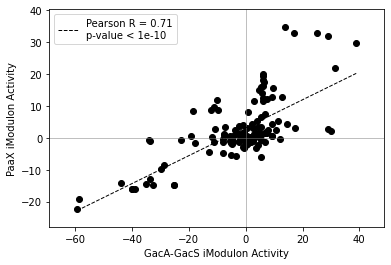

In [9]:
compare_activities(ica_data, 'GacA-GacS', "PaaX", colors='black')
#plt.savefig("../figures/Figure4_CompareActivities_GacAS.PaaX.svg",transparent=True)

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


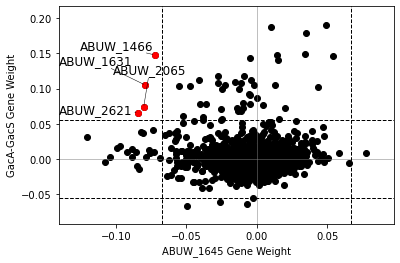

In [45]:
compare_gene_weights(ica_data, 'ABUW_1645', 'GacA-GacS', colors='black')
#plt.savefig("../figures/SuppFigure2d.svg",transparent=True)

# Analysis of the PaaX iModulon

## PaaX iModulon

<AxesSubplot:xlabel='Gene Start', ylabel='Paa Gene Weight'>

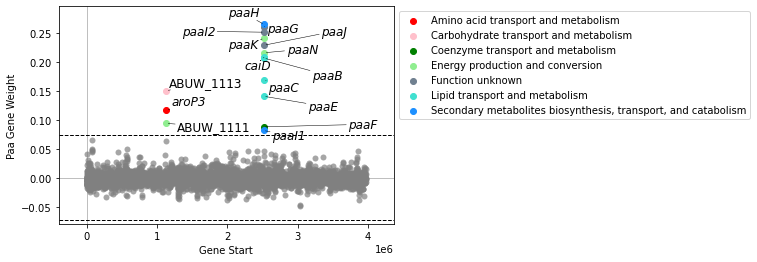

In [23]:
plot_gene_weights(ica_data, 'PaaX')

In [24]:
ica_data.view_imodulon('PaaX')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_1111,0.093645,ABUW_1111,NaN,1129545,1130975,+,aldehyde dehydrogenase,Energy production and conversion,NaN,NaN
ABUW_1113,0.149995,ABUW_1113,NaN,1131668,1133389,+,indole-3-pyruvate decarboxylase,Carbohydrate transport and metabolism,NaN,NaN
ABUW_1114,0.115942,aroP3,NaN,1133530,1134909,+,aromatic amino acid transport protein,Amino acid transport and metabolism,NaN,NaN
ABUW_2523,0.081449,paaI1,NaN,2514893,2515276,-,thioesterase domain protein,"Secondary metabolites biosynthesis, transport,...",NaN,GacA-GacS
ABUW_2526,0.087677,paaF,NaN,2516965,2518254,-,phenylacetate-CoA ligase,Coenzyme transport and metabolism,NaN,GacA-GacS
ABUW_2527,0.140371,paaE,NaN,2518295,2519503,-,beta-ketoadipyl CoA thiolase,Lipid transport and metabolism,NaN,GacA-GacS
ABUW_2528,0.168992,paaC,NaN,2519516,2521054,-,3-hydroxyacyl-CoA dehydrogenase,Lipid transport and metabolism,NaN,GacA-GacS
ABUW_2529,0.206249,paaB,NaN,2521057,2521848,-,enoyl-CoA hydratase,Lipid transport and metabolism,NaN,GacA-GacS
ABUW_2530,0.207653,caiD,NaN,2521848,2522621,-,enoyl-coA hydratase,Lipid transport and metabolism,NaN,NaN
ABUW_2531,0.240085,paaK,NaN,2522630,2523691,-,phenylacetate-CoA oxygenase/reductase%2C PaaK ...,Energy production and conversion,NaN,GacA-GacS
